<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/Lab_Program_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Coding Guide for EDA with Personal Email

## 1. Technical Requirements


Download Your Email Data from Gmail

Follow these steps to download your Gmail data:

1. Log in to Gmail: Access your Gmail account using your credentials.

2. Go to Google Takeout:
Visit [Google Takeout](https://takeout.google.com)

3. Select Gmail Data Only:

  - Deselect all items except for Gmail.
  - You should see a screen like this:
  - Scroll down and select only Gmail for export.



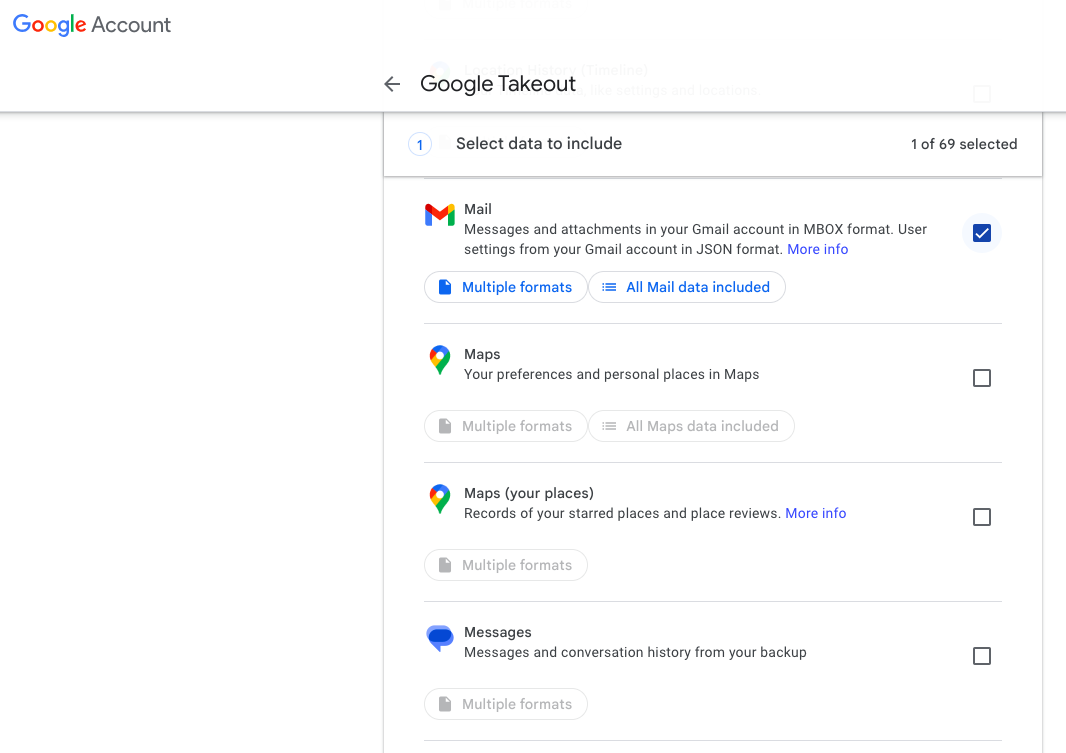

4. Choose File Type, Frequency, and Destination:

  - In the "Choose file type, frequency & destination" section:
    - Set Delivery method to Send download link via email.
    - Under Frequency, select Export once.
    - For File type, choose .zip.
    - Set the File size limit to 2 GB.

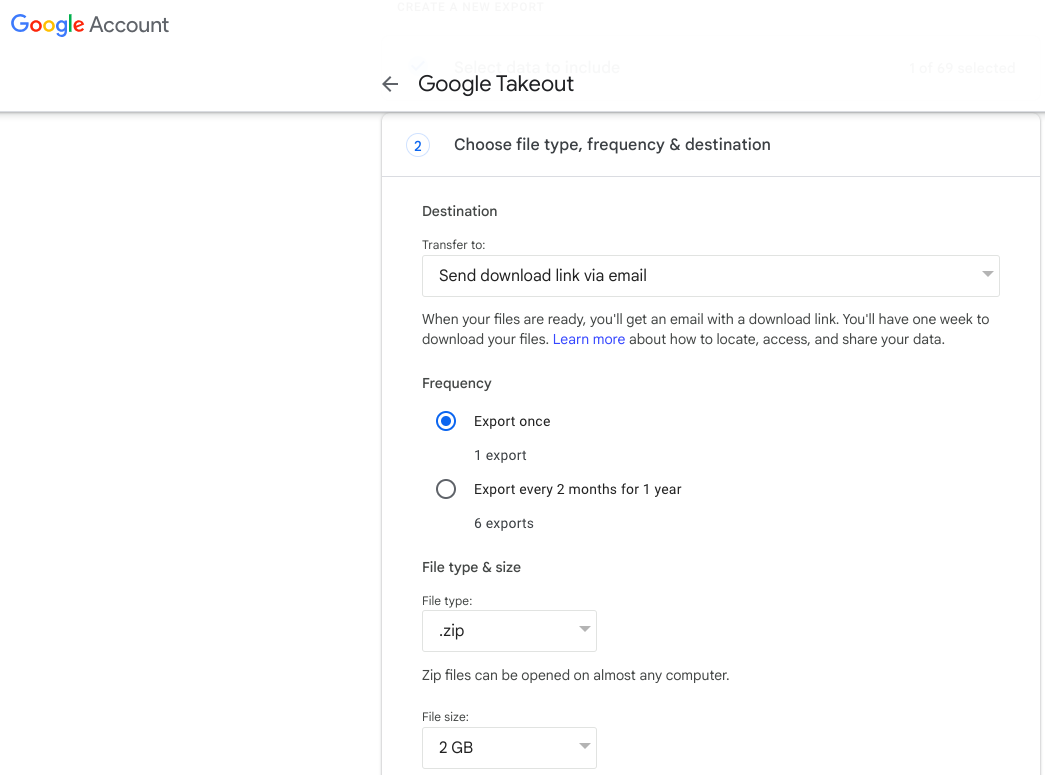

5. Create Archive:

  - Once all settings are configured, click on the Create Export button.
  - Google will start preparing your data. This may take some time depending on the amount of data in your Gmail account.
6. Download the Archive:

  - Once the export is ready, you will receive an email with the download link.
  - Click the link, download the .zip file, and extract it to access the .mbox file for analysis.


## 2. Loading the Dataset

1. Set Up and Load Required Libraries

In [ ]:
# Step 1: Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Install mailbox if not already installed
!pip install mailbox

  Preparing metadata (setup.py) ... done
  Created wheel for mailbox: filename=mailbox-0.4-py3-none-any.whl size=4684 sha256=6aae85e422b475cdc01180ebf5f9a7955aec73af228154d0a80096b10a45c9fa
  Stored in directory: /root/.cache/pip/wheels/7a/95/10/e0864f9d19ec7dcdf7eeedcb286ec19fc2556404a5e63e12de
Successfully built mailbox


2. 2. Load the Dataset

In [ ]:
# Step 2: Load the mbox dataset
import mailbox

# Replace 'PATH_TO_DOWNLOADED_MBOX_FILE' with the actual path to your .mbox file
mboxfile = "All mail Including Spam and Trash.mbox"
mbox = mailbox.mbox(mboxfile)
print(mbox)
print(f"Total messages in mailbox: {len(mbox)}")

Total messages in mailbox: 55


3. Inspect the Dataset Keys

In [ ]:
# Step 3: List all available keys in the first email
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
X-MSFBL
DKIM-Signature
To
Message-ID
Date
Content-Type
MIME-Version
Userid
Isdebug
Emailidentifier
Subject
From
Campaignid
Reply-To
Feedback-ID
List-Unsubscribe
List-Unsubscribe-Post
List-Id


## 3. Data Transformation

Although the extracted data returns many objects, we will only extract the required fields.

###  Data cleansing

Let's create a CSV file with only the required fields. Let's start with the following steps:

In [ ]:
import csv
with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject', 'from', 'date', 'to', 'label', 'thread'])
    for message in mbox:
        writer.writerow([
            message['subject'],
            message['from'],
            message['date'],
            message['to'],
            message['X-Gmail-Labels'],
            message['X-GM-THRID']
        ])

### Loading the CSV file

We will load the CSV file. Refer to the following code block:

In [ ]:
import pandas as pd
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

### Converting the date

In [ ]:
print(dfs.dtypes)
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object


### Removing NaN values

In [ ]:
dfs = dfs[dfs['date'].notna()]
dfs.to_csv('gmail.csv')

### Applying descriptive statistics

In [ ]:
dfs.info()
dfs.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1 to 55
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  51 non-null     object             
 1   from     55 non-null     object             
 2   date     55 non-null     datetime64[ns, UTC]
 3   to       53 non-null     object             
 4   label    55 non-null     object             
 5   thread   55 non-null     object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 3.0+ KB


,subject,from,date,to,label,thread
1,"Shilpashree, here's your roadmap to GenAI exce...","""Shreya Sahu"" <shreya@newsletters.analyticsvid...",2024-12-05 11:12:30+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Updates,Unread",1817598651215254030
2,7 Tasks To Do Before Spring,Graham from AutomatED <graham@mail.automatedte...,2024-12-20 18:04:29+00:00,"""shilpashreesjbit@gmail.com"" <shilpashreesjbit...","Inbox,Category Updates,Unread",1818983526767673861
3,"Shilpashree, act fast! Save 10% on the Max pla...","""Artlist"" <team@newsletter.artlist.io>",2024-11-25 19:21:24+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Promotions,Unread",1816727503694501289
4,Mary Joy Odewale recently posted,LinkedIn <updates-noreply@linkedin.com>,2024-11-27 14:43:31+00:00,Shilpashree S <shilpashreesjbit@gmail.com>,"Inbox,Category Updates,Unread",1816887155527187072
5,Time-saving resources for teachers =?UTF-8?B?8...,Canva <marketing@engage.canva.com>,2024-11-15 05:30:38+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Promotions,Unread",1815765203867928136
6,=?UTF-8?q?Ends_Today!_=E2=8F=B3_35%_Off_Premiu...,TryHackMe <hello@tryhackme.com>,2024-11-30 10:04:41+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Updates,Unread",1817141399242266843
7,How I Am Using a Lifetime 100% Free Server | H...,Medium Daily Digest <noreply@medium.com>,2024-12-01 01:50:00+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Updates,Unread",1817200876355596992
8,Build Your First GenAI Application: Free Works...,"""Sakshi Raheja"" <sakshi.raheja@newsletters.ana...",2024-10-20 07:00:39+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Updates,Unread",1813415345319862772
9,7 Strategies To Help You Remember 80% of Every...,Medium Daily Digest <noreply@medium.com>,2024-11-02 01:50:00+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Promotions,Unread",1814573564222539306
10,Data Science is dying; =?UTF-8?B?aGVyZeKAmXM=?...,Medium Daily Digest <noreply@medium.com>,2024-11-09 01:50:00+00:00,shilpashreesjbit@gmail.com,"Inbox,Category Updates,Unread",1815207742110645868


### Data refactoring

The from field contains more information than we need. We just need to
extract an email address from that field. Let's do some refactoring:

In [ ]:
import re
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan

dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))
myemail = 'itsmeskm99@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x == myemail else 'inbox')
dfs.columns


Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

### Dropping columns

The "to" column only contains your own email. So, we can drop this
irrelevant column:

In [ ]:
dfs.drop(columns='to')


,subject,from,date,label,thread
1,"Shilpashree, here's your roadmap to GenAI exce...",shreya@newsletters.analyticsvidhya.com,2024-12-05 11:12:30+00:00,inbox,1817598651215254030
2,7 Tasks To Do Before Spring,graham@mail.automatedteach.com,2024-12-20 18:04:29+00:00,inbox,1818983526767673861
3,"Shilpashree, act fast! Save 10% on the Max pla...",team@newsletter.artlist.io,2024-11-25 19:21:24+00:00,inbox,1816727503694501289
4,Mary Joy Odewale recently posted,updates-noreply@linkedin.com,2024-11-27 14:43:31+00:00,inbox,1816887155527187072
5,Time-saving resources for teachers =?UTF-8?B?8...,marketing@engage.canva.com,2024-11-15 05:30:38+00:00,inbox,1815765203867928136
6,=?UTF-8?q?Ends_Today!_=E2=8F=B3_35%_Off_Premiu...,hello@tryhackme.com,2024-11-30 10:04:41+00:00,inbox,1817141399242266843
7,How I Am Using a Lifetime 100% Free Server | H...,noreply@medium.com,2024-12-01 01:50:00+00:00,inbox,1817200876355596992
8,Build Your First GenAI Application: Free Works...,sakshi.raheja@newsletters.analyticsvidhya.com,2024-10-20 07:00:39+00:00,inbox,1813415345319862772
9,7 Strategies To Help You Remember 80% of Every...,noreply@medium.com,2024-11-02 01:50:00+00:00,inbox,1814573564222539306
10,Data Science is dying; =?UTF-8?B?aGVyZeKAmXM=?...,noreply@medium.com,2024-11-09 01:50:00+00:00,inbox,1815207742110645868


### Refactoring timezones

we will refactor the timezone based on our timezone:

In [ ]:
import pytz

def refactor_timezone(x):
    # Ensure x is timezone-aware first
    ist = pytz.timezone('Asia/Kolkata')  # India Standard Time
    est = pytz.timezone('US/Eastern')   # Eastern Standard Time

    # Localize x to IST if it's naive (not timezone-aware)
    if x.tzinfo is None:
        x = ist.localize(x)

    return x.astimezone(est)

# Apply the function to the 'date' column
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))


Add Day of the Week Column:

In [ ]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

Add Time of Day Column:

In [ ]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute / 60 + x.second / 3600)

Refactor Hour, Year Integer, and Year Fraction:

In [ ]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear / 365.25)

Set Date as Index and Remove Original Date Column:

In [ ]:
dfs.index = dfs['date']
del dfs['date']
dfs.head()

,subject,from,to,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,
2024-12-05 06:12:30-05:00,"Shilpashree, here's your roadmap to GenAI exce...",shreya@newsletters.analyticsvidhya.com,shilpashreesjbit@gmail.com,inbox,1817598651215254030,Thursday,6.208333,6,2024,2024.930869
2024-12-20 13:04:29-05:00,7 Tasks To Do Before Spring,graham@mail.automatedteach.com,"""shilpashreesjbit@gmail.com"" <shilpashreesjbit...",inbox,1818983526767673861,Friday,13.074722,13,2024,2024.971937
2024-11-25 14:21:24-05:00,"Shilpashree, act fast! Save 10% on the Max pla...",team@newsletter.artlist.io,shilpashreesjbit@gmail.com,inbox,1816727503694501289,Monday,14.356667,14,2024,2024.903491
2024-11-27 09:43:31-05:00,Mary Joy Odewale recently posted,updates-noreply@linkedin.com,Shilpashree S <shilpashreesjbit@gmail.com>,inbox,1816887155527187072,Wednesday,9.725278,9,2024,2024.908966
2024-11-15 00:30:38-05:00,Time-saving resources for teachers =?UTF-8?B?8...,marketing@engage.canva.com,shilpashreesjbit@gmail.com,inbox,1815765203867928136,Friday,0.510556,0,2024,2024.876112


## 4. Data Analysis

Let's answer the following questions one by one:
1. How many emails did I send during a given timeframe?
2. At what times of the day do I send and receive emails with Gmail?
3. What is the average number of emails per day?
4. What is the average number of emails per hour?
5. Whom do I communicate with most frequently?
6. What are the most active emailing days?
7. What am I mostly emailing about?

### Setup and Imports

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import pytz
import datetime


### How many emails did I send during a given timeframe?

In [ ]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs['label'].value_counts())

Wed, 07 Aug 2024 11:54 AM
Sun, 22 Dec 2024 04:26 PM
label
inbox    55
Name: count, dtype: int64


### At what times of the day do I send and receive emails with Gmail?

<ipython-input-24-06553dc34b2b>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()])
<ipython-input-24-06553dc34b2b>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()])


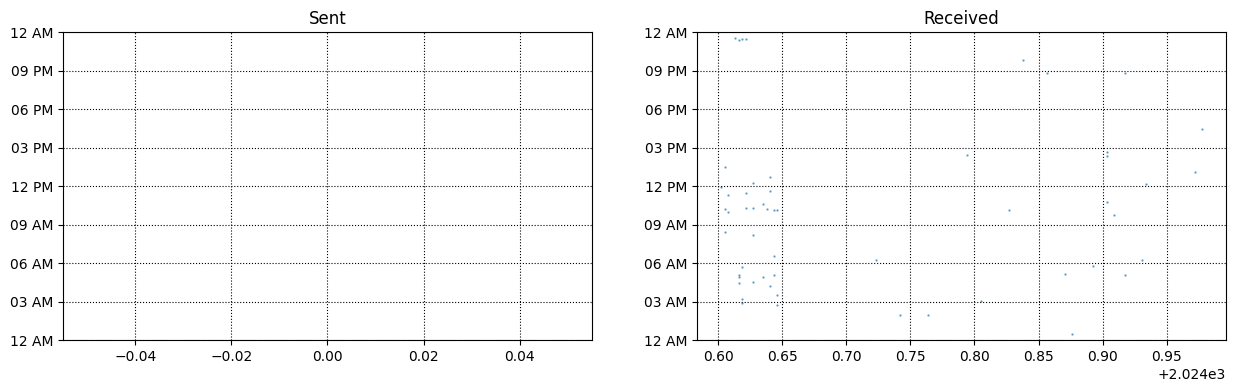

In [ ]:
sent = dfs[dfs['label'] == 'sent']
received = dfs[dfs['label'] == 'inbox']
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(df), dtype='bool')
    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')
    return ax
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')
plt.show()

<ipython-input-24-06553dc34b2b>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()])
<ipython-input-25-be58cb6e8586>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-24-06553dc34b2b>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()])


ValueError: zero-size array to reduction operation maximum which has no identity

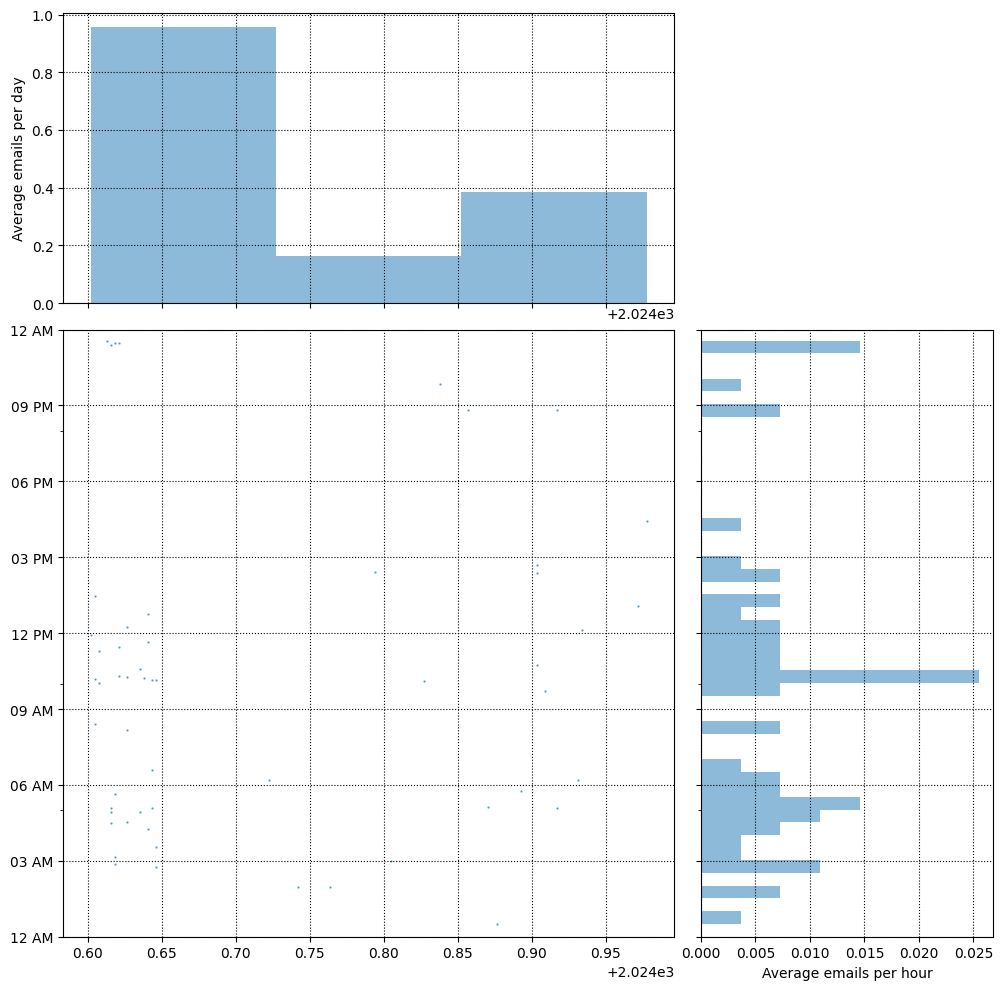

In [ ]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')


def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False, weight_fun=None, **plot_kwargs):
    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5 * (xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
class TriplePlot:
    def __init__(self):
        gs = gridspec.GridSpec(6, 6)
        self.ax1 = plt.subplot(gs[2:6, :4])
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False);
        self.ax3 = plt.subplot(gs[:2, :4])
        plt.setp(self.ax3.get_xticklabels(), visible=False);

    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
        self.ax2.set_xlabel('Average emails per hour')
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
        self.ax3.set_ylabel('Average emails per day')
plt.figure(figsize=(12,12));
tpl = TriplePlot()
tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);
plt.show()